In [9]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from pmdarima import auto_arima
import seaborn as sns


# load data
file_path = 'Submited version.csv'  #
data = pd.read_csv(file_path)

# select canada
canada_data = data[data['Economies'] == 'Canada'][['Year', 'Global Innovation Index']].dropna()

# set index
canada_data.set_index('Year', inplace=True)

# normalize
scaler = MinMaxScaler()
canada_data['Global Innovation Index'] = scaler.fit_transform(canada_data[['Global Innovation Index']])


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-6.851, Time=1.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-5.035, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-11.207, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.61 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-4.114, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-9.229, Time=0.23 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-9.234, Time=0.26 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-8.370, Time=0.38 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-2.975, Time=0.02 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 2.737 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   11
Model:               SARIMAX(1, 1, 0)   Log Likelihood                   8.603
Date:                Fri, 22 Nov 2024   AIC                          

e:\an\envs\ece1786\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
e:\an\envs\ece1786\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


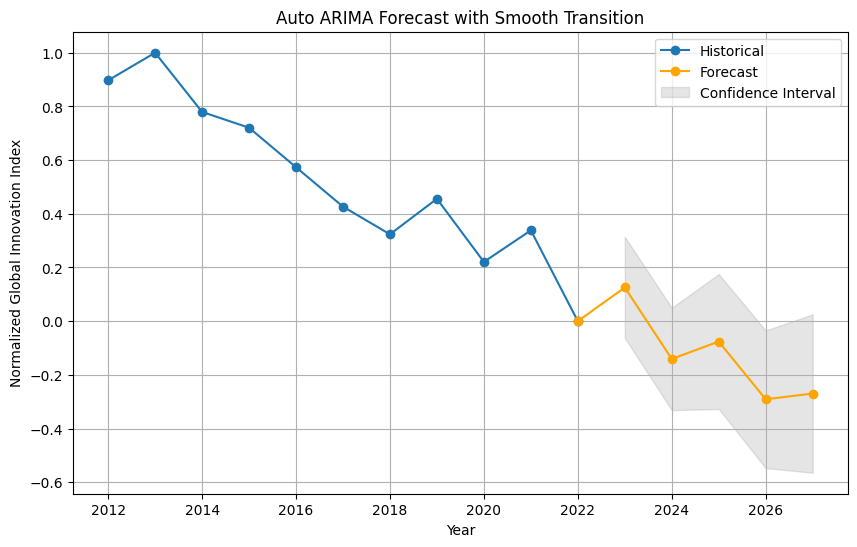

In [ ]:
# auto ARIMA
arima_model = auto_arima(
    canada_data['Global Innovation Index'],
    seasonal=False,  
    trace=True,  
    suppress_warnings=True,
    stepwise=True  
)

# summary
print(arima_model.summary())

# auto fit
arima_model.fit(canada_data['Global Innovation Index'])

# forecast
n_periods = 5  
forecast, conf_int = arima_model.predict(n_periods=n_periods, return_conf_int=True)


forecast_extended = [canada_data['Global Innovation Index'].iloc[-1]] + forecast.tolist()
forecast_index_extended = [canada_data.index[-1]] + list(forecast_index)

# visualize
plt.figure(figsize=(10, 6))
plt.plot(canada_data.index, canada_data['Global Innovation Index'], label='Historical', marker='o')
plt.plot(forecast_index_extended, forecast_extended, label='Forecast', marker='o', color='orange')
plt.fill_between(
    forecast_index, conf_int[:, 0], conf_int[:, 1],
    color='gray', alpha=0.2, label='Confidence Interval'
)
plt.title('Auto ARIMA Forecast with Smooth Transition')
plt.xlabel('Year')
plt.ylabel('Normalized Global Innovation Index')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
columns_to_analyze = [
    'Institutions', 'Human capital and research', 'Infrastructure',
    'Market sophistication', 'Business sophistication',
    'Knowledge and technology outputs', 'Creative outputs',
    'Global Innovation Index'
]

correlation_data = data[data['Economies'] == 'Canada'][columns_to_analyze].dropna()

In [ ]:

correlation_matrix = correlation_data.corr()
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                                  Institutions  Human capital and research  \
Institutions                          1.000000                   -0.556786   
Human capital and research           -0.556786                    1.000000   
Infrastructure                       -0.022557                    0.066553   
Market sophistication                 0.226423                   -0.495744   
Business sophistication               0.079894                    0.159931   
Knowledge and technology outputs      0.578374                   -0.144604   
Creative outputs                      0.625241                   -0.376360   
Global Innovation Index               0.797326                   -0.391271   

                                  Infrastructure  Market sophistication  \
Institutions                           -0.022557               0.226423   
Human capital and research              0.066553              -0.495744   
Infrastructure                          1.000000    

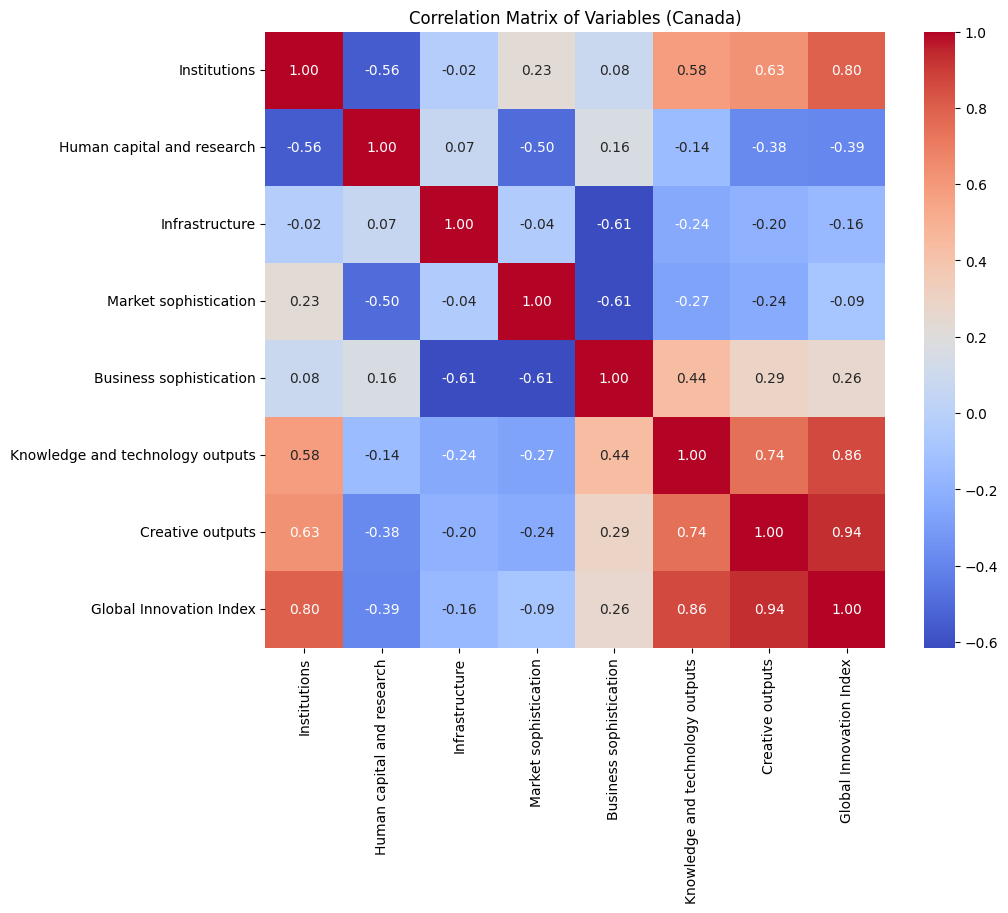

In [ ]:

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Variables (Canada)")
plt.show()
